## The PPDAC Cycle

In this notebook, I will use the PPDAC concept, learnt from the ,,The art of statistics. Learning from Data", written by David Spiegelhalter.

__1. PROBLEM__ 

The sinking of the Titanic is one of the most infamous shipwrecks in history. 

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. 

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. 

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

__2. PLAN__

In the first part, I will collect, clean and make feature engineering on the data. 

After I make EDA (Exploratory Data Analyis) on the data, I should make a predictive model (supervised model) in order to predict whether a person will survive or not, based on the attributes it has. I will measure the metrics for more algorithms and compare them in order to find the best algorithm for this data-set.

__3. DATA__

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

In this part, I will clean the data and manage it in order to make a better anaysis.

__4. ANALYSIS__

In this part, I will perform EDA. I will explore the data with descriptive statistics and summarize our variables. In this section, features will be classified and correlations will be made between variables.

Also, in this section I will build some Supervised Machine Learning models in order to find which works best for this particular data-set.

__5. CONCLUSION__

We will interpretate the metrics found out in Chapter 4 and make conclusions about the data set.

## Step 3: Collect, Manage and Clean Data

Since the data was given to us, all we have to do is clean it.


### Step 3.1 Import Libraries

In [1]:
import numpy as np   #foundational package for scientific computing
import pandas as pd  #collection of functions for data processing and analysis modeled after R dataframes with SQL like features

#Visualization
import matplotlib.pyplot as plt #collection of functions for scientific and publication-ready visualization
import seaborn as sns

# Model Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics	

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Step 3.2 Overview data

In [2]:
data_train =  pd.read_csv("train.csv")
data_test =  pd.read_csv("test.csv")

data = pd.concat([data_train, data_test], axis = 0, sort = False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
#Show statistics about the data
data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


### Step 3.3 Clean Data

There are four columns with missing values (Age, Cabin, Fare, Embarked). Survived column has Nulls because the Test dataset does not have that information (that is the task).

In [5]:
# First, let's see how many null values are in the dataset
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
#We will complete the missing values and drop unnecessary columns

#Complete Embarked with the mode (the value that repeats the most) -> is discrete so mode makes sense
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

#Complete Fare with the median value (continous variable)
data["Fare"] = data["Fare"].fillna(data["Fare"].median())

#Drop the Cabin column
data = data.drop(columns=["Cabin", "Ticket"])

In [7]:
#For the Age column, I will extract the title and based on it, I will complete the missing values

def extract_title(name):
    '''
    The function has roles to extract the person title from the Name column
    '''
    
    # Split the text by commas and get the second element
    title_section = name.split(", ")[1]
    
    # Split the title section into words
    words = title_section.split(".")
    
    #We apply .lower() to make the text lowercase and .strip() to get rid of white spaces and .
    title = words[0].lower().strip('., ')
    
    return title

# Make a new column named Title and extract the titles
data["Title"] = data["Name"].apply(extract_title)

print(data["Title"].value_counts())

# In this case, we know the titles, but we have to make the assumption that there could be more.
# So, in this case, i am going to make a special category called rare_titles

#Count the occurances of each title
title_counts = data["Title"].value_counts()
#I set the treshold to 10 (arbitrary)
rare_titles = title_counts[title_counts < 10].index
#Put all the titles with less than 10 occurances in a special category called "rare_titles"
data.loc[data["Title"].isin(rare_titles), "Title"] = "rare_titles"

print(data["Title"].value_counts())

Title
mr              757
miss            260
mrs             197
master           61
rev               8
dr                8
col               4
mlle              2
major             2
ms                2
lady              1
sir               1
mme               1
don               1
capt              1
the countess      1
jonkheer          1
dona              1
Name: count, dtype: int64
Title
mr             757
miss           260
mrs            197
master          61
rare_titles     34
Name: count, dtype: int64


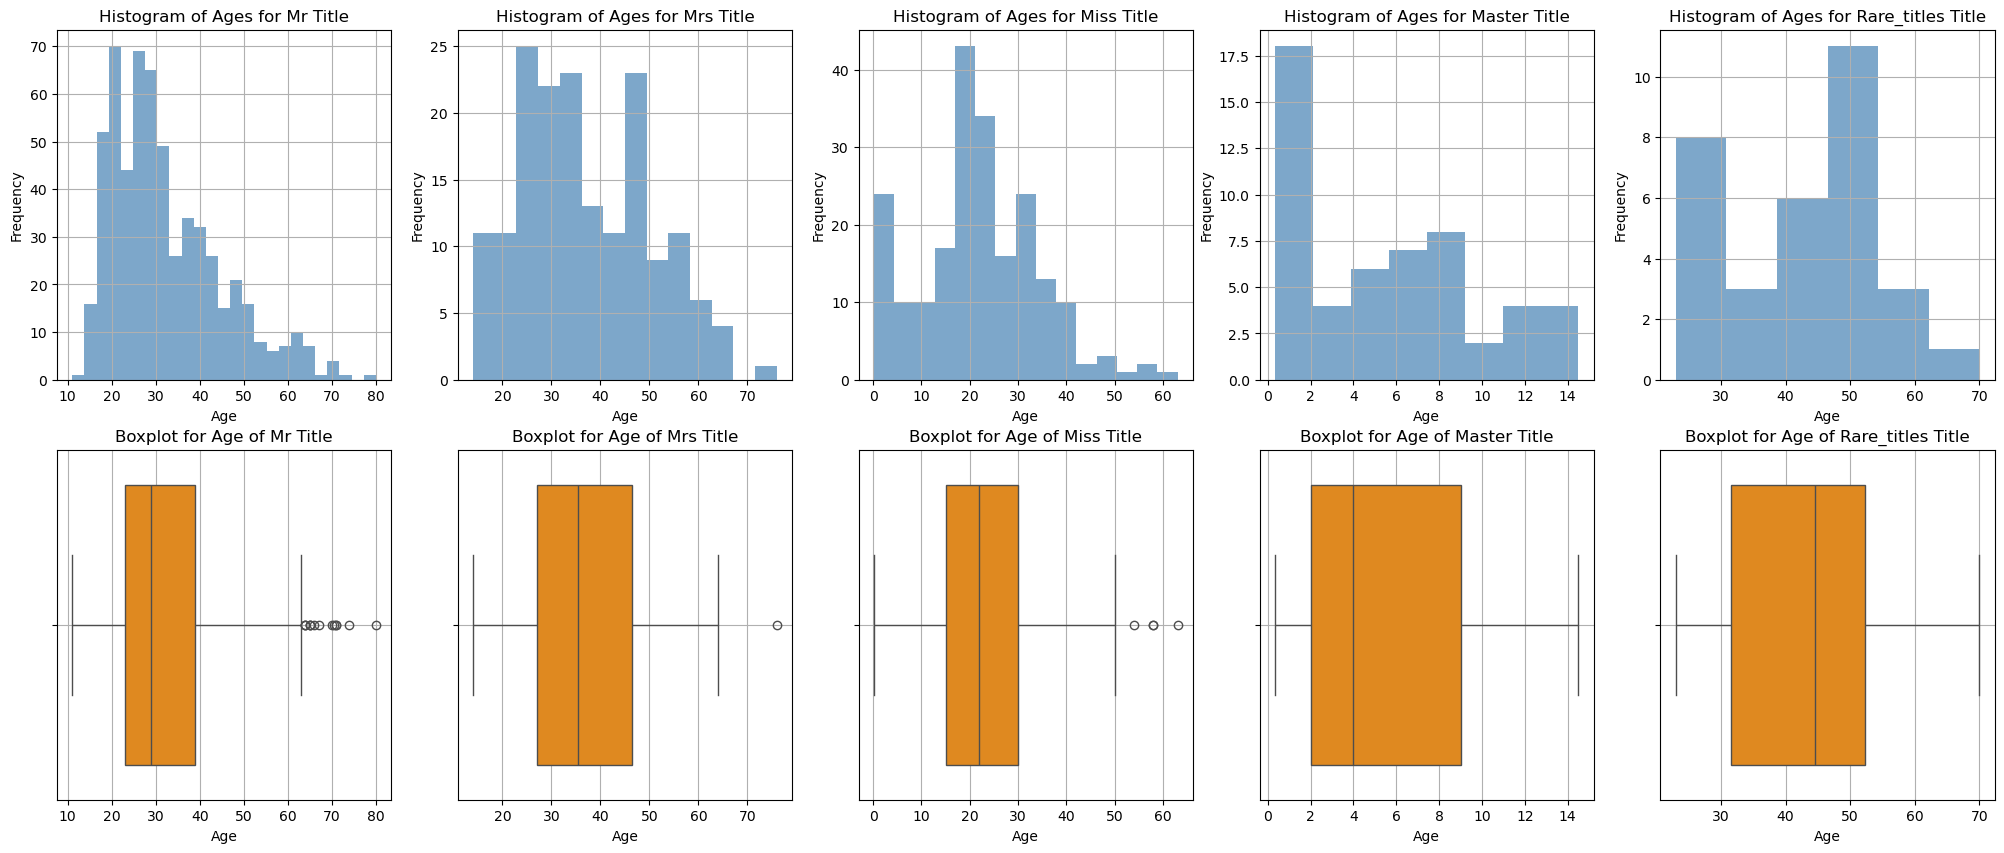

Title
mr             752
miss           210
mrs            196
master         117
rare_titles     34
Name: count, dtype: int64


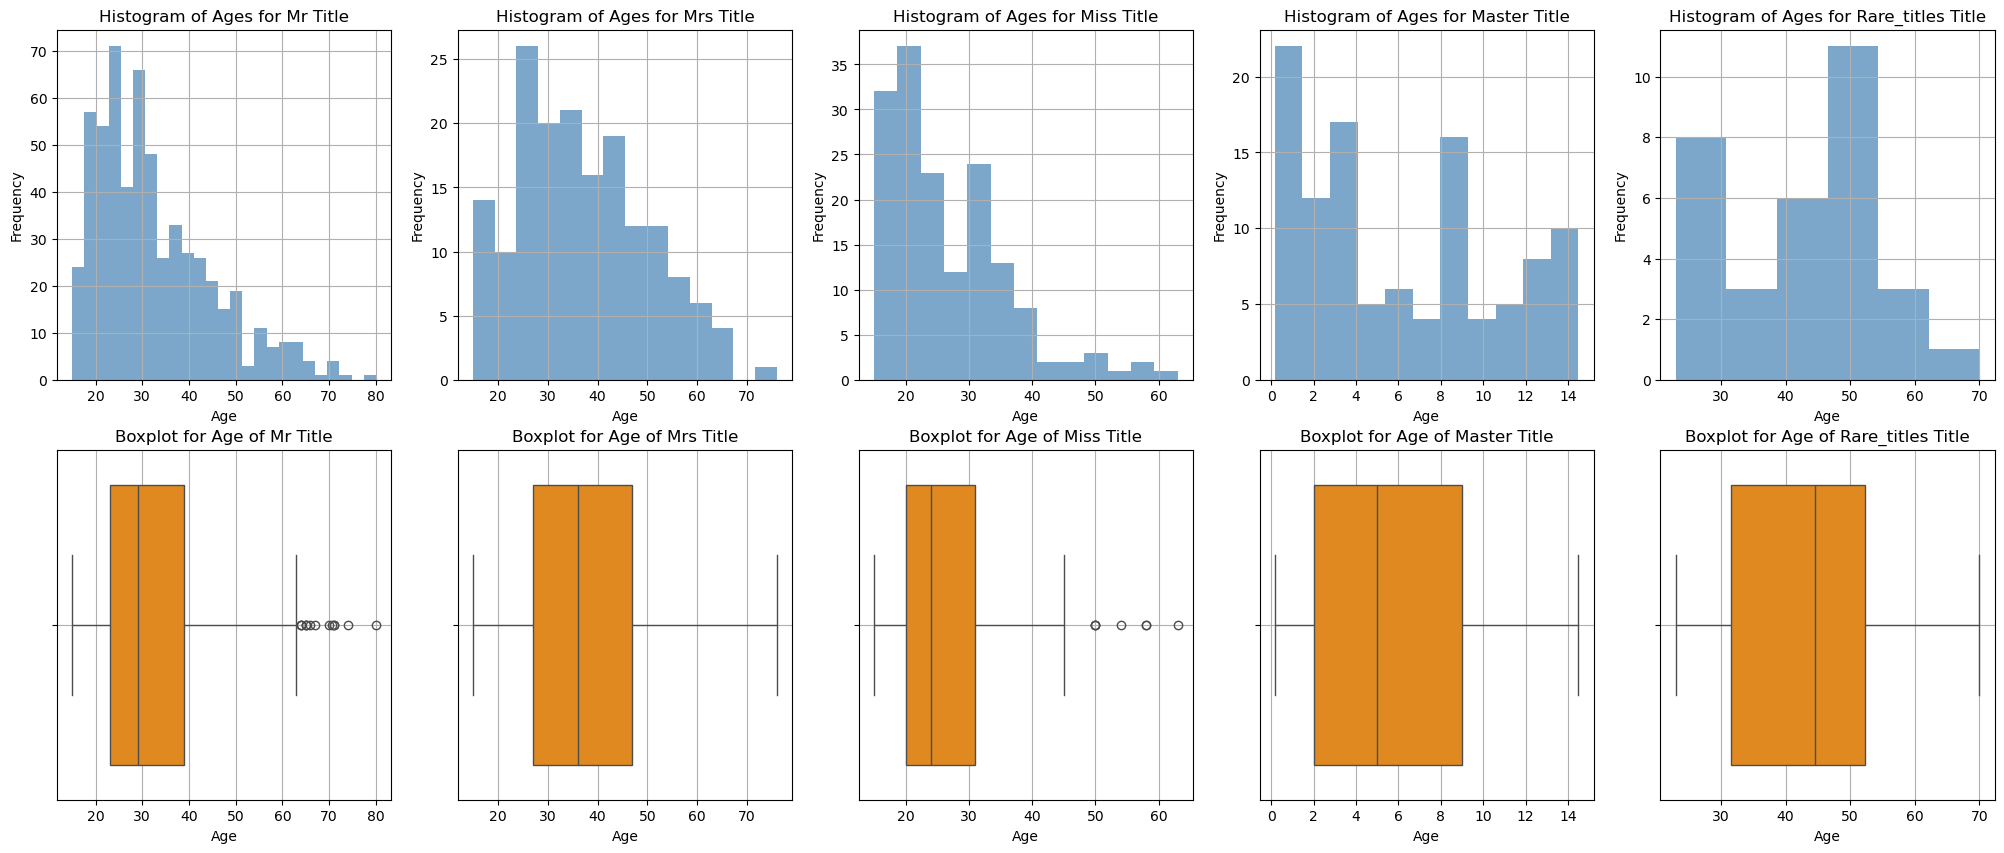

In [8]:
def plot_histogram_and_boxplot(df):
    
    #Extract unique titles
    titles = df["Title"].unique()
    
    # Determine the number titles
    num_titles = len(titles)
    
    # Create subplots with 2 rows and num_titles columns
    fig, axes = plt.subplots(2, num_titles, figsize=(5 * num_titles, 10))
    
    for i, title in enumerate(titles):
    
        #We make the filter to filter the dataframe to get only the ages of those with the title: title
        mask_age = ((df["Title"] == title) & (df["Age"].notnull()))
        df_hist = df[mask_age]

        #We calculate the optimal number of bins
        nr_bins = int(np.floor(np.sqrt(df_hist["Age"].count())) + 1)


        # Plot histogram
        ax_hist = axes[0, i]
        ax_hist.hist(df_hist["Age"], bins=nr_bins, color="steelblue", alpha=0.7)
        ax_hist.set_xlabel("Age")
        ax_hist.set_ylabel("Frequency")
        ax_hist.set_title(f"Histogram of Ages for {title.capitalize()} Title")
        ax_hist.grid()

        # Plot boxplot
        ax_box = axes[1, i]
        sns.boxplot(x=df_hist["Age"].reset_index(drop=True), ax=ax_box, color = "darkorange")
        ax_box.set_title(f"Boxplot for Age of {title.capitalize()} Title")
        ax_box.grid()
    
    plt.show()


plot_histogram_and_boxplot(data)

# From the graphs above, we see that Master tile, which are kids have the ages approximately between (0, 15)
#So, I am goin to convert the title for all the people with the age < 15 to master
data.loc[data["Age"] < 15, "Title"] = "master"
print(data["Title"].value_counts())

plot_histogram_and_boxplot(data)

In [9]:
#Complete Age with the median value for each title (continous variable) 

data_mean_age_title = round(data["Age"].groupby(data["Title"]).median(), 1).reset_index().set_index("Title")
data.loc[data["Age"].isnull(), "Age"] = data.loc[data["Age"].isnull(), "Title"].map(data_mean_age_title["Age"]) 

### Step 3.4 Feature Engineering + Convert Formats

We will generate new columns with respect to the columns we already have in order to put into the spotlight new information.

We will convert categorical data to numbers in order to be able to make analysis on that data.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
 10  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,mr


In [15]:
# We combine SibSp and Parch into one single column named: ,,Family"
data["Family"] = data["SibSp"] + data["Parch"] + 1

#IF there is only 1 member in the family, maybe it would be better to also have a binary column
data["Single"] = 1
data.loc[data["Family"] != 1, "Single"] = 0

'''
# Now, we convert words to numbers for each column
data["Sex"]      = data["Sex"].map({"male": 0, "female": 1})
data["Embarked"] = data["Embarked"].map({'S':0,'C':1,'Q':2})
data["Title"]    = data["Title"].map({'mr':0,'miss':1,'mrs':2, 'master':3, 'rare_titles':4})
'''

data1 = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'Family', 'Single'] #pretty name/values for charts

data1_dummy = pd.get_dummies(data[data1])
data1_dummy = data1_dummy.astype(int)

In [16]:
data1_dummy

,Pclass,SibSp,Parch,Age,Fare,Family,Single,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_master,Title_miss,Title_mr,Title_mrs,Title_rare_titles
0,3,1,0,22,7,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,38,71,2,0,1,0,1,0,0,0,0,0,1,0
2,3,0,0,26,7,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,0,35,53,2,0,1,0,0,0,1,0,0,0,1,0
4,3,0,0,35,8,1,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,29,8,1,1,0,1,0,0,1,0,0,1,0,0
414,1,0,0,39,108,1,1,1,0,1,0,0,0,0,0,0,1
415,3,0,0,38,7,1,1,0,1,0,0,1,0,0,1,0,0
416,3,0,0,29,8,1,1,0,1,0,0,1,0,0,1,0,0
